In [1]:
from scipy.io import loadmat
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
from matplotlib.axes import Axes
from sfoda.utils.othertime import datenum2datetime
from sfoda.utils.otherplot import axcolorbar
from matplotlib.dates import DateFormatter

In [2]:
from sfoda.utils.otherplot import axcolorbar
from matplotlib.dates import DateFormatter



In [3]:
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']='small'
plt.rcParams['pcolor.shading']='auto'

In [4]:
# 75 m mooring
lon = 113 + 55.994/60
lat = -21 - 51.596/60
lon, lat

(113.93323333333333, -21.859933333333334)

In [5]:
matfile = '/home/jupyter-mrayson/data/UWA/Ningaloo2009/SBE39_synch_75m.mat'

data1 = loadmat(matfile)
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x4452', 'x4456', 'x4453', 'x4454', 'x4455', 'x3719', 'x3720', 'x3721', 'x3722', 'x3723', 'x3724', 'x3725', 'x3726', 'x3727', 'x3728', 'x3729', 'x3882', 'x4382', 'x4567'])

In [6]:
data1['x4456'].shape # 6.5 mASB

(2, 3359379)

In [7]:
dtime = np.array(datenum2datetime(data1['x4456'][0,:]))

In [8]:
ds_1sec = xr.DataArray(data1['x4456'][1,:], coords={'time':dtime })
ds_1sec

<xarray.DataArray (time: 3359379)>
array([28.8316, 28.8161, 28.8201, ..., 21.288 , 21.2755, 21.268 ])
Coordinates:
  * time     (time) datetime64[ns] 2009-11-08T16:15:41.999997 ... 2010-01-05T...

In [9]:
matfile = '/home/jupyter-mrayson/data/UWA/Ningaloo2009/NLO_75m.mat'
data = loadmat(matfile)
time, temp, depth = data['T'][0][0]
temp.shape

(19, 160509)

In [10]:
dtime = np.array(datenum2datetime(time[0,:]))

ds = xr.DataArray(temp, coords={'height':depth[0,:],'time':dtime })
ds = ds.isel(height=[0,1,2,4,5,6,7,8,9,10,11,12, 14,15,16,17,18])

In [11]:
ds.name = ''
ds.attrs = {'units':'$^{\circ}$C'}

/tmp/ipykernel_2158699/128286687.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_2158699/128286687.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


'FIGURES/NingalooBores_20091215080000.png'

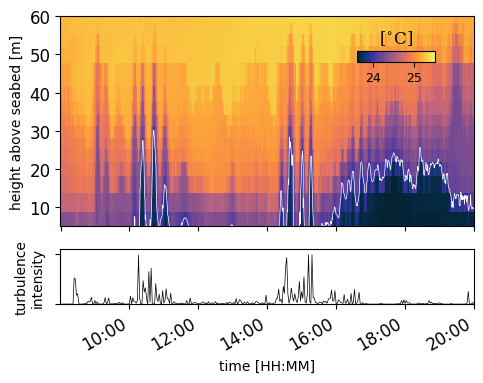

In [13]:
# t1,t2 = '2009-12-14 00:00:00', '2009-12-15 00:00:00'
# t1,t2 = '2009-12-15 00:00:00', '2009-12-16 00:00:00'
t1,t2 = '2009-12-15 08:00:00', '2009-12-15 20:00:00'

# t1,t2 = '2009-11-11 00:00:00', '2009-11-12 00:00:00'

#fig, ax = plt.subplots(1,1, figsize=(7,4))
plt.figure(figsize=(5,4))
ax=plt.subplot2grid((4,1),(0,0),rowspan=3)
cc = ds.sel(time=slice(t1,t2)).plot(shading='flat', cmap='cmo.thermal', 
                               vmin=23.6, vmax=25.5,
                              #cbar_kwargs={"shrink": 0.3, 'pad':-0.1},
                               #cbar_kwargs={"shrink": 0.3, 'panchor':(0.1,0.7),
                               #             "orientation":'horizontal'},
                               add_colorbar=False
                              )
ds.sel(time=slice(t1,t2)).plot.contour(levels=[24], colors='w', linewidths=0.5)
ax.set_xlabel('')

ax.set_ylabel('height above seabed [m]')
#add_colorbar(ax, cc, 23.6, 25.5, '[$^{\circ}$C]')
cb = axcolorbar(
    cc,
    pos=[0.7, 0.8, 0.2, 0.04],
    ax=ax,
    fig=None,
    orientation='horizontal',
)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 10,
        }
#cb.set_ticks([vmin,vmax])
cb.ax.set_title('[$^{\circ}$C]', fontdict=font)
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.set_xticklabels([])
ax.set_ylim(5,60)

ax=plt.subplot2grid((4,1),(3,0),rowspan=1, )
ds_1sec.sel(time=slice(t1,t2)).resample(time="120s").var().plot(c='k', lw=0.5)
ax.set_ylim(0,0.011)
t=ds.sel(time=slice(t1,t2))['time']
ax.set_xlim(t[0].values, t[-1].values)
ax.set_yticklabels([])
ax.set_ylabel('turbulence\nintensity')

# Define the date format
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('time [HH:MM]')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
outfile = f"FIGURES/NingalooBores_{t1.replace('-',' ').replace(' ','').replace(':','')}.png"
plt.savefig(outfile)
outfile

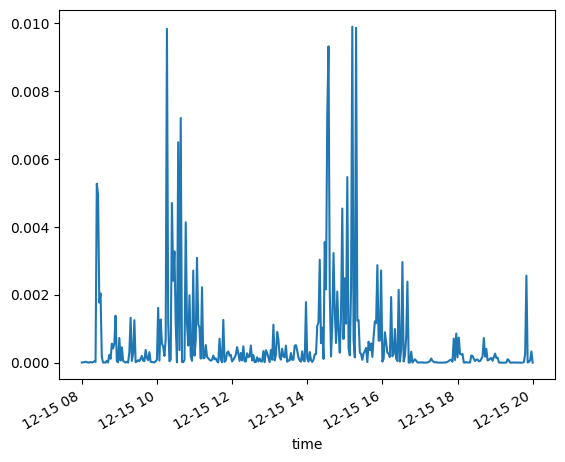

In [77]:
# ds_1sec.sel(time=slice(t1,t2)).plot()
ds_1sec.sel(time=slice(t1,t2)).resample(time="120s").var().plot()

In [90]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    width_ratios=None,
    height_ratios=None,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels